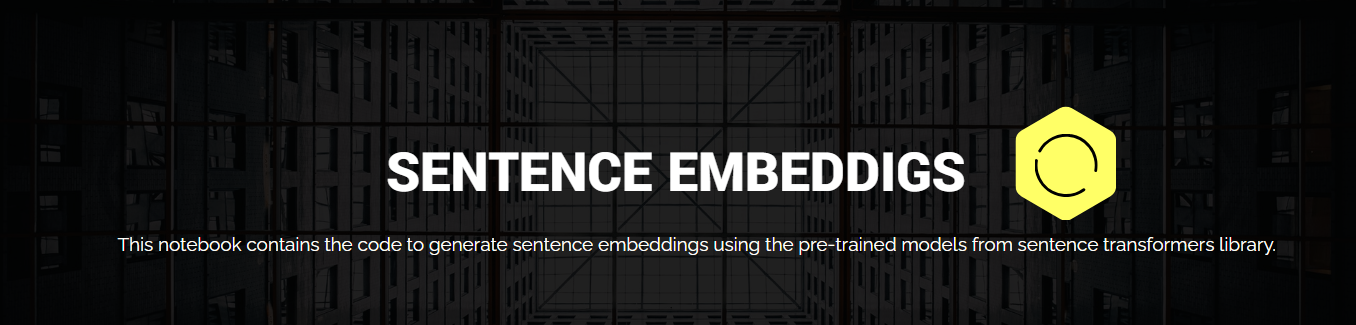

##### Link : [sentence-transformers](https://www.sbert.net/index.html) library.

!pip install sentence_transformers

## IMPORT LIBRARIES

In [1]:
import pandas as pd
from pathlib import Path

from sentence_transformers import SentenceTransformer

In [2]:
PATH_DATA_BASE = Path.cwd().parent / "data"
PATH_SENTENCES = Path.cwd().parent / "models/sentences"
PATH_EMBEDDINGS = Path.cwd().parent / "models/embeddings"

## LOAD THE DATA

In [3]:
# Setting pandas option to display the full content of DataFrame columns without truncation
pd.set_option('display.max_colwidth', None)

In [4]:
import pandas as pd
dataset = pd.read_csv(PATH_DATA_BASE / 'filtered_data.csv')
dataset.head()

,titles,abstracts,terms,urls,ids
0,DAE-Former: Dual Attention-guided Efficient Transformer for Medical Image Segmentation,"Transformers have recently gained attention in the computer vision domain due\nto their ability to model long-range dependencies. However, the self-attention\nmechanism, which is the core part of the Transformer model, usually suffers\nfrom quadratic computational complexity with respect to the number of tokens.\nMany architectures attempt to reduce model complexity by limiting the\nself-attention mechanism to local regions or by redesigning the tokenization\nprocess. In this paper, we propose DAE-Former, a novel method that seeks to\nprovide an alternative perspective by efficiently designing the self-attention\nmechanism. More specifically, we reformulate the self-attention mechanism to\ncapture both spatial and channel relations across the whole feature dimension\nwhile staying computationally efficient. Furthermore, we redesign the skip\nconnection path by including the cross-attention module to ensure the feature\nreusability and enhance the localization power. Our method outperforms\nstate-of-the-art methods on multi-organ cardiac and skin lesion segmentation\ndatasets without requiring pre-training weights. The code is publicly available\nat https://github.com/mindflow-institue/DAEFormer.",['cs.CV'],http://arxiv.org/abs/2212.13504v3,2212.13504v3
1,Multi-modal Learning with Missing Modality via Shared-Specific Feature Modelling,"The missing modality issue is critical but non-trivial to be solved by\nmulti-modal models. Current methods aiming to handle the missing modality\nproblem in multi-modal tasks, either deal with missing modalities only during\nevaluation or train separate models to handle specific missing modality\nsettings. In addition, these models are designed for specific tasks, so for\nexample, classification models are not easily adapted to segmentation tasks and\nvice versa. In this paper, we propose the Shared-Specific Feature Modelling\n(ShaSpec) method that is considerably simpler and more effective than competing\napproaches that address the issues above. ShaSpec is designed to take advantage\nof all available input modalities during training and evaluation by learning\nshared and specific features to better represent the input data. This is\nachieved from a strategy that relies on auxiliary tasks based on distribution\nalignment and domain classification, in addition to a residual feature fusion\nprocedure. Also, the design simplicity of ShaSpec enables its easy adaptation\nto multiple tasks, such as classification and segmentation. Experiments are\nconducted on both medical image segmentation and computer vision\nclassification, with results indicating that ShaSpec outperforms competing\nmethods by a large margin. For instance, on BraTS2018, ShaSpec improves the\nSOTA by more than 3% for enhancing tumour, 5% for tumour core and 3% for whole\ntumour.",['cs.CV'],http://arxiv.org/abs/2307.14126v1,2307.14126v1
2,Unite-Divide-Unite: Joint Boosting Trunk and Structure for High-accuracy Dichotomous Image Segmentation,"High-accuracy Dichotomous Image Segmentation (DIS) aims to pinpoint\ncategory-agnostic foreground objects from natural scenes. The main challenge\nfor DIS involves identifying the highly accurate dominant area while rendering\ndetailed object structure. However, directly using a general encoder-decoder\narchitecture may result in an oversupply of high-level features and neglect the\nshallow spatial information necessary for partitioning meticulous structures.\nTo fill this gap, we introduce a novel Unite-Divide-Unite Network (UDUN} that\nrestructures and bipartitely arranges complementary features to simultaneously\nboost the effectiveness of trunk and structure identification. The proposed\nUDUN proceeds from several strengths. First, a dual-size input feeds into the\nshared backbone to produce more holistic and detailed features while keeping\nthe model lightweight. Secon

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65711 entries, 0 to 65710
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     65711 non-null  object
 1   abstracts  65711 non-null  object
 2   terms      65711 non-null  object
 3   urls       65711 non-null  object
 4   ids        65711 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


<CENTER><H2><B>Sentence-Transformers Models</B></H2></CENTER>

<h3>What is a sentence-transformers model?</h3>
    <h4> - It maps sentences & paragraphs to a N dimensional dense vector space and can be used for tasks like clustering or semantic search.</h4>


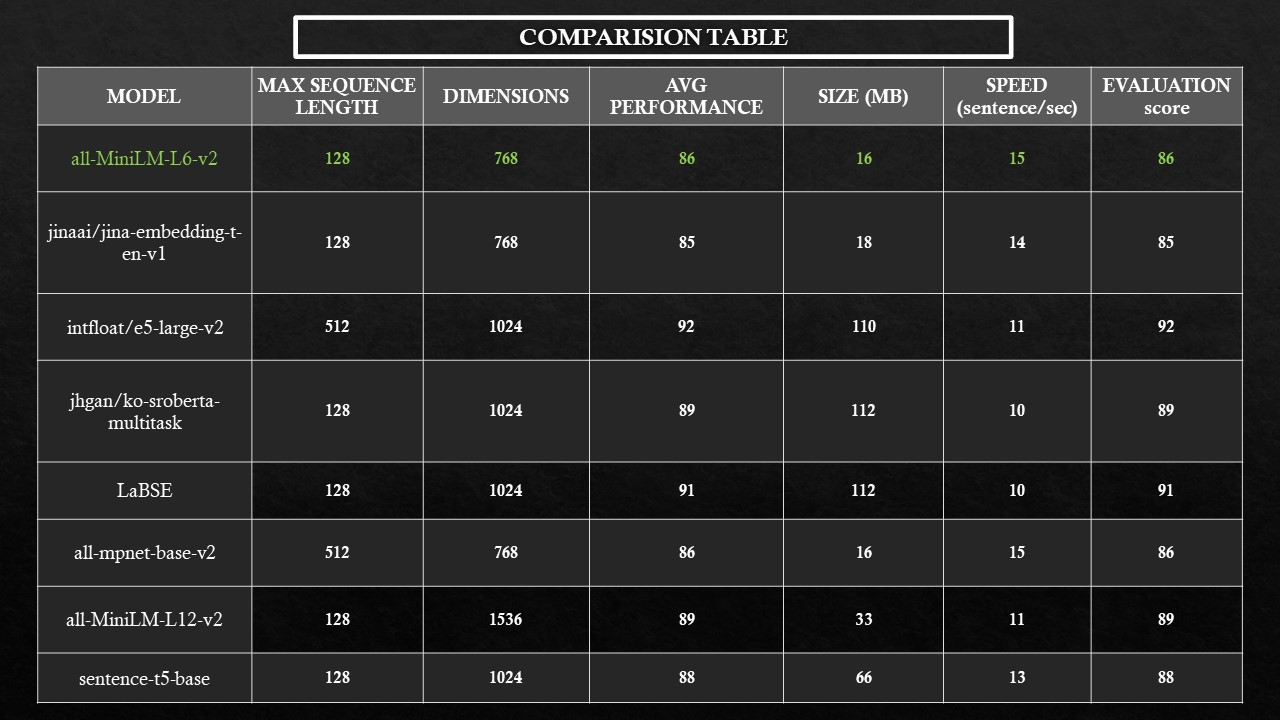

### After comparing the all above models I have choosed the `all-MiniLM-L6-v2` Model .

- MiniLM is a smaller variant of the BERT model which has been designed to provide high-quality language understanding capabilities while being significantly smaller and more efficient. The "all-MiniLM-L6-v2" model refers to a specific configuration of the MiniLM model.
---esources

#### Here are some reasons why I have chosen this model for my project:
---
1. Efficiency:
   - MiniLM models are smaller and faster than full-size BERT models, which can be a major advantage if you're working on a project with limited computational resources or if you need to process large amounts of data quickly.
---
2. Performance:
   - Despite their smaller size, MiniLM models often perform at a comparable level to full-size BERT models on a variety of NLP tasks.
   - This means that you can often use a MiniLM model without sacrificing much in the way of performance.
   - In fact, the Performance Sentence Embeddings metric which is the average performance on encoding sentences over 14 diverse tasks from different domains is `68.06` for the `all-MiniLM-L6-v2` model, which is very good to start with.
---

3. Ease of Use:
- If you're using a library like Hugging Face's Transformers, it can be relatively straightforward to load a pre-trained MiniLM model and fine-tune it for your specific task.
---
4. Lower Memory Requirements:
   - Given its smaller size, MiniLM requires less memory for training and inference.
   - This could be a crucial factor if you're working with limited hardware resources

In [6]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Our feature we like to encode
sentences = dataset['titles']

# Features are encoded by calling model.encode()
embeddings = model.encode(sentences)

#### Print the embeddings

In [7]:
c = 0
for sentence, embedding in zip(sentences, embeddings):

    print("Sentence:", sentence)
    print("Embedding dimension:", len(embedding))
    print("Title length:", len(sentence))
    print("")

    if c >=5:
        break
    c +=1 

Sentence: DAE-Former: Dual Attention-guided Efficient Transformer for Medical Image Segmentation
Embedding dimension: 384
Title length: 86

Sentence: Multi-modal Learning with Missing Modality via Shared-Specific Feature Modelling
Embedding dimension: 384
Title length: 80

Sentence: Unite-Divide-Unite: Joint Boosting Trunk and Structure for High-accuracy Dichotomous Image Segmentation
Embedding dimension: 384
Title length: 103

Sentence: MDViT: Multi-domain Vision Transformer for Small Medical Image Segmentation Datasets
Embedding dimension: 384
Title length: 84

Sentence: Learning Transferable Object-Centric Diffeomorphic Transformations for Data Augmentation in Medical Image Segmentation
Embedding dimension: 384
Title length: 118

Sentence: Image Segmentation Keras : Implementation of Segnet, FCN, UNet, PSPNet and other models in Keras
Embedding dimension: 384
Title length: 96



## Save the Model

In [8]:
import pickle

# Saving sentences and corresponding embeddings
with open(PATH_EMBEDDINGS / 'Embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

with open(PATH_SENTENCES / 'Sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

# Testing the embedding model¶

In [9]:
paper_you_like = input("Enter your topic of interest here 👇 \n")
paper_you_like

Enter your topic of interest here 👇 
 Language Models


'Language Models'

In [10]:
from sentence_transformers import util
cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like))

In [11]:
import torch
top_similar_papers = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
top_similar_papers

torch.return_types.topk(
values=tensor([[0.7386],
        [0.7329],
        [0.7290],
        [0.7224],
        [0.7217]]),
indices=tensor([[43688],
        [43568],
        [43755],
        [44280],
        [39786]]))

In [12]:
for i in top_similar_papers.indices:
    print(sentences[i.item()])

Large Language Models as Tool Makers
Large Language Models as General Pattern Machines
Large Language Model Programs
Knowledge is a Region in Weight Space for Fine-tuned Language Models
Language models are weak learners
